# Loading data from the point wire dataset
For easy access to the data, we provide the WireharnessData class.

In [1]:
from utils.point_wire import WireharnessData
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
%matplotlib inline

point_wire_path = "/data/wire_harness_tim/data/labels/set2"
wh_data = WireharnessData(point_wire_path)

## Iterating through the dataset
Our dataset consists of 40 sets of 300 pointcloud samples.
Our splits always consist of whole datasets.

In [2]:
# example to get the percentage of the classes in the train set
point_count = 0
class_counts = np.array([0,0,0,0,0])

for set_id in tqdm(wh_data.get_train_split()):
    for sample_id in range(wh_data.get_samples_per_set()):
        seg = wh_data.load_seg(set_id, sample_id)
        class_counts += np.bincount(seg, minlength=5)
        point_count += 2048

class_counts = class_counts / point_count
print(f"Wire:        {100*class_counts[0]:.1f}%")
print(f"Endpoint:    {100*class_counts[1]:.1f}%")
print(f"Bifurcation: {100*class_counts[2]:.1f}%")
print(f"Connector:   {100*class_counts[3]:.1f}%")
print(f"Noise:       {100*class_counts[4]:.1f}%")

100%|██████████| 32/32 [00:06<00:00,  4.61it/s]

Wire:        71.0%
Endpoint:    3.6%
Bifurcation: 10.7%
Connector:   13.2%
Noise:       1.6%


## Loading a pointcloud
The pointcloud is stored as a numpy array of shape (2048,3) and contains the x,y,z values of the pointcloud.

(2048, 3)


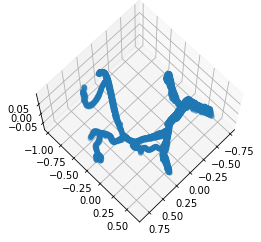

In [3]:
pcl = wh_data.load_pcl(0, 0)
print(pcl.shape)

# visualization
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=70, azim=45)
ax.scatter3D(pcl[:,0], pcl[:,1], pcl[:,2], )
plt.show()

## Loading the segmentation
The segmenation can be loaded as a np array of shape (2048,). The labels correspond to the following segmentations:
| Label | Definition |
| ------------- | ------------- |
| 0 | Wire |
| 1 | Endpoint |
| 2 | Bifurcation |
| 3 | Connector |
| 4 | Noise |

In [4]:
pcl = wh_data.load_pcl(1, 0)
seg = wh_data.load_seg(1, 0)
print(seg.shape)

(2048,)


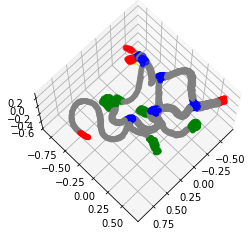

In [5]:
# visualization
colors = [
    'gray',
    'red',
    'blue',
    'green',
    'yellow'
]
seg_colors = [colors[i] for i in seg]
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=70, azim=45)
ax.scatter3D(pcl[:,0], pcl[:,1], pcl[:,2], c=seg_colors)
plt.show()

## Loading the skeleton of the sample
The skeleton contains of a dictionary with 2 elements:
- "points": a numpy array of shape (n,3) with the x,y,z coordinates of the skeleton points
- "adjacency-matrix": a numpy array of shape (n,n) where the element at index i,j is True if there is a connection between points[i] and points[j] and False if not.

In [8]:
skeleton = wh_data.load_skeleton(1, 0)
nodes = skeleton['nodes']
print(nodes.shape)
adj = skeleton['adj']
print(adj.shape)

(425, 3)
(425, 425)


In [9]:
ax = plt.figure().add_subplot(projection='3d')
ax.view_init(elev=70, azim=45)
for i in range(len(adj)):
    for j in range(i+1, len(adj)):
        if not adj[i,j]:
            continue

        ax.plot3D([nodes[i,0], nodes[j,0]], [nodes[i,1], nodes[j,1]], [nodes[i,1], nodes[j,1]], c="blue")
plt.show()

KeyboardInterrupt: 

: 

: 